# 1 Simple Linear Regression Modeling

You’ll learn the basics of this popular statistical model, what regression is, and how linear and logistic regressions differ. You’ll then learn how to fit simple linear regression models with numeric and categorical explanatory variables, and how to describe the relationship between the response and explanatory variables using model coefficients.

# Which one is the response variable?

Regression lets you predict the values of a response variable from known values of explanatory variables. Which variable you use as the response variable depends on the question you are trying to answer, but in many datasets, there will be an obvious choice for variables that would be interesting to predict. Over the next few exercises, you'll explore a Taiwan real estate dataset with four variables.

Variable	Meaning
dist_to_mrt_station_m	Distance to nearest MRT metro station, in meters.
n_convenience	No. of convenience stores in walking distance.
house_age_years	The age of the house, in years, in three groups.
price_twd_msq	House price per unit area, in New Taiwan dollars per meter squared.
Print taiwan_real_estate in the console to view the dataset, and decide which variable would make a good response variable.

# Possible answers

( ) dist_to_mrt_station_m

( ) n_convenience

( ) house_age_years

(x) price_twd_msq

# Visualizing two numeric variables

Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

taiwan_real_estate is available as a pandas DataFrame.

# Instructions:

- Import the seaborn package, aliased as sns.
- Using taiwan_real_estate, draw a scatter plot of "price_twd_msq" (y-axis) versus "n_convenience" (x-axis).

In [2]:
import pandas as pd

In [3]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
print(taiwan_real_estate.head())

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


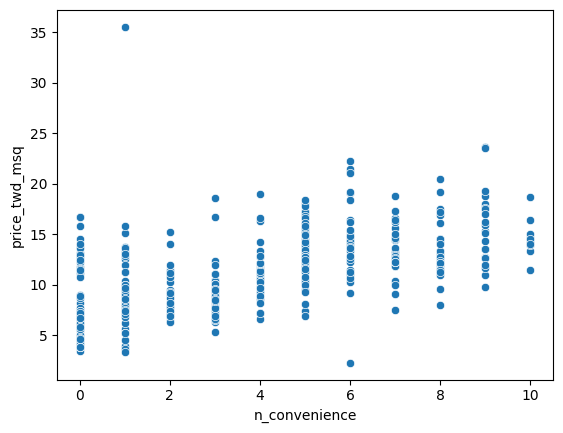

In [4]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)
# Show the plot
plt.show()

- Draw a trend line calculated using linear regression. Omit the confidence interval ribbon. Note: The scatter_kws argument, pre-filled in the exercise, makes the data points 50% transparent.

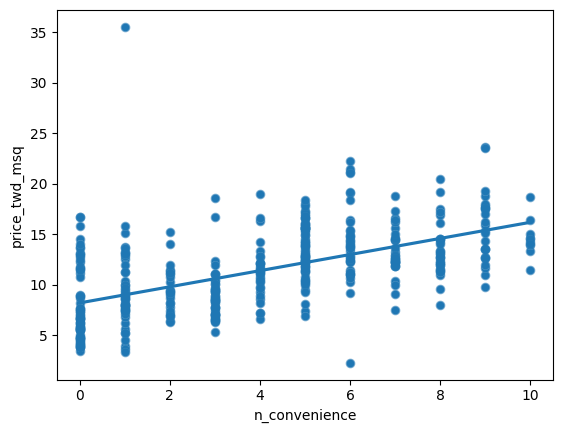

In [5]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience", 
y="price_twd_msq",
         data=taiwan_real_estate,
         ci=False,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

# Estimate the intercept

Linear regression models always fit a straight line to the data. Straight lines are defined by two properties: their intercept and their slope.

Here, you can see a scatter plot of house price per area versus number of nearby convenience stores, using the Taiwan real estate dataset.

Click the plot, then estimate the intercept of the linear regression trend line.

( ) 0

(x) 8.22

( ) 16.21

# Linear regression with ols()

While sns.regplot() can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.

Time to run your first model!

taiwan_real_estate is available. TWD is an abbreviation for Taiwan dollars.

In addition, for this exercise and the remainder of the course, the following packages will be imported and aliased if necessary: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

# Instructions:

- Import the ols() function from the statsmodels.formula.api package.
- Run a linear regression with price_twd_msq as the response variable, n_convenience as the explanatory variable, and taiwan_real_estate as the dataset. Name it mdl_price_vs_conv.
- Fit the model.
- Print the parameters of the fitted model.

In [ ]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224
n_convenience    0.798
dtype: float64

# Question
- The model had an Intercept coefficient of 8.2242. What does this mean?
Possible answers

( ) On average, houses had a price of 8.2242 TWD per square meter.

(x) On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.

( ) The minimum house price was 8.2242 TWD per square meter.

( ) The minimum house price with zero convenience stores nearby was 8.2242 TWD per square meter.

( ) The intercept tells you nothing about house prices.


# Visualizing numeric vs. categorical

If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

taiwan_real_estate is available.

# Instructions:

- Using taiwan_real_estate, plot a histogram of price_twd_msq with 10 bins. Split the plot by house_age_years to give 3 panels.

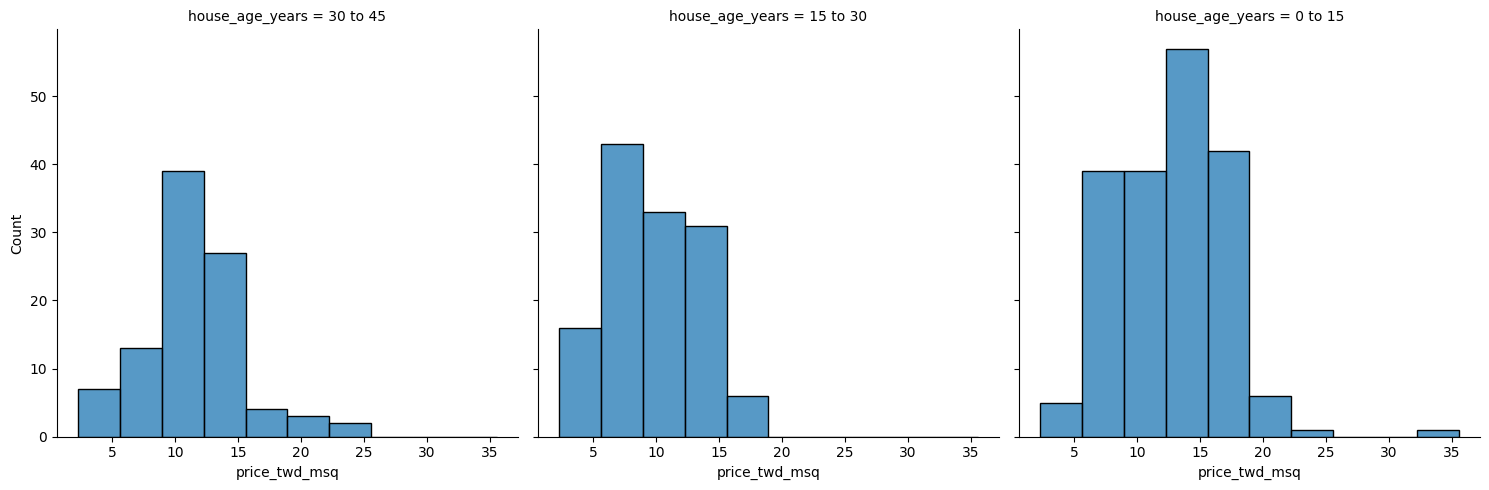

In [7]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
            x="price_twd_msq",
            col="house_age_years",
            bins=10)

# Show the plot
plt.show()

# Calculating means by category

A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. As such, you can compare each category in more detail.

Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help you understand the output of a linear regression with a categorical variable.

taiwan_real_estate is available as a pandas DataFrame.

# Instructions:

- Group taiwan_real_estate by house_age_years and calculate the mean price (price_twd_msq) for each age group. Assign the result to mean_price_by_age.
- Print the result and inspect the output.

In [8]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


# Linear regression with a categorical explanatory variable

Great job calculating those grouped means! As mentioned in the last video, the means of each category will also be the coefficients of a linear regression model with one categorical variable. You'll prove that in this exercise.

To run a linear regression model with categorical explanatory variables, you can use the same code as with numeric explanatory variables. The coefficients returned by the model are different, however. Here you'll run a linear regression on the Taiwan real estate dataset.

taiwan_real_estate is available and the ols() function is also loaded.

# Instructions:

- Run and fit a linear regression with price_twd_msq as the response variable, house_age_years as the explanatory variable, and taiwan_real_estate as the dataset. Assign to mdl_price_vs_age.
- Print its parameters.

In [ ]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq~house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637
house_age_years[T.15 to 30]    -2.761
house_age_years[T.30 to 45]    -1.244
dtype: float64

- Update the model formula so that no intercept is included in the model. Assign to mdl_price_vs_age0.
- Print its parameters.

In [ ]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637
house_age_years[15 to 30]     9.877
house_age_years[30 to 45]    11.393
dtype: float64